In [91]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import pandas_profiling
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ***EDA***

In [92]:
df = pd.read_csv('heart.csv')

In [93]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1


In [94]:
df.shape

(303, 14)

In [95]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


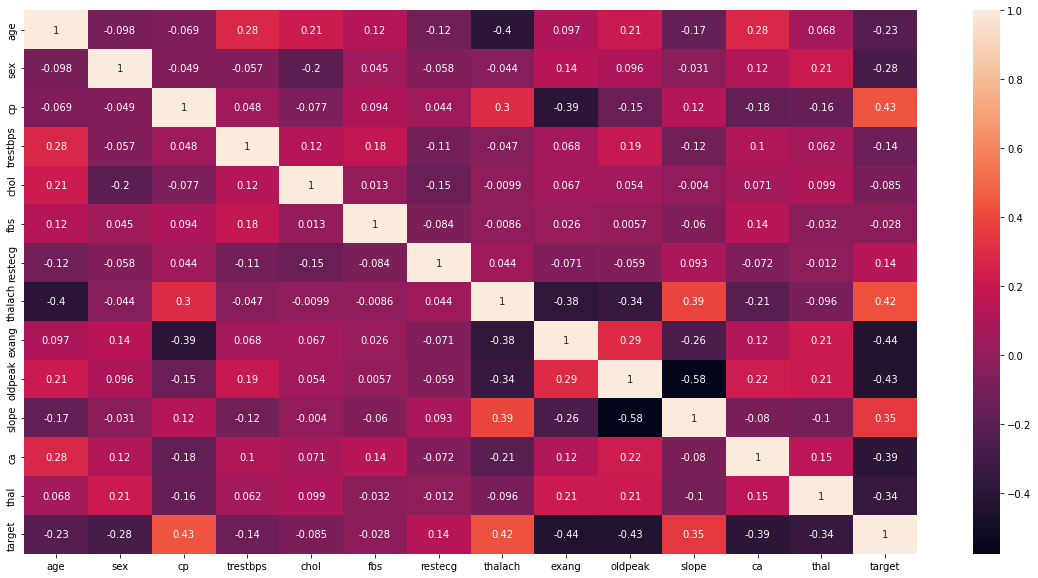

In [97]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show();

In [98]:
df.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

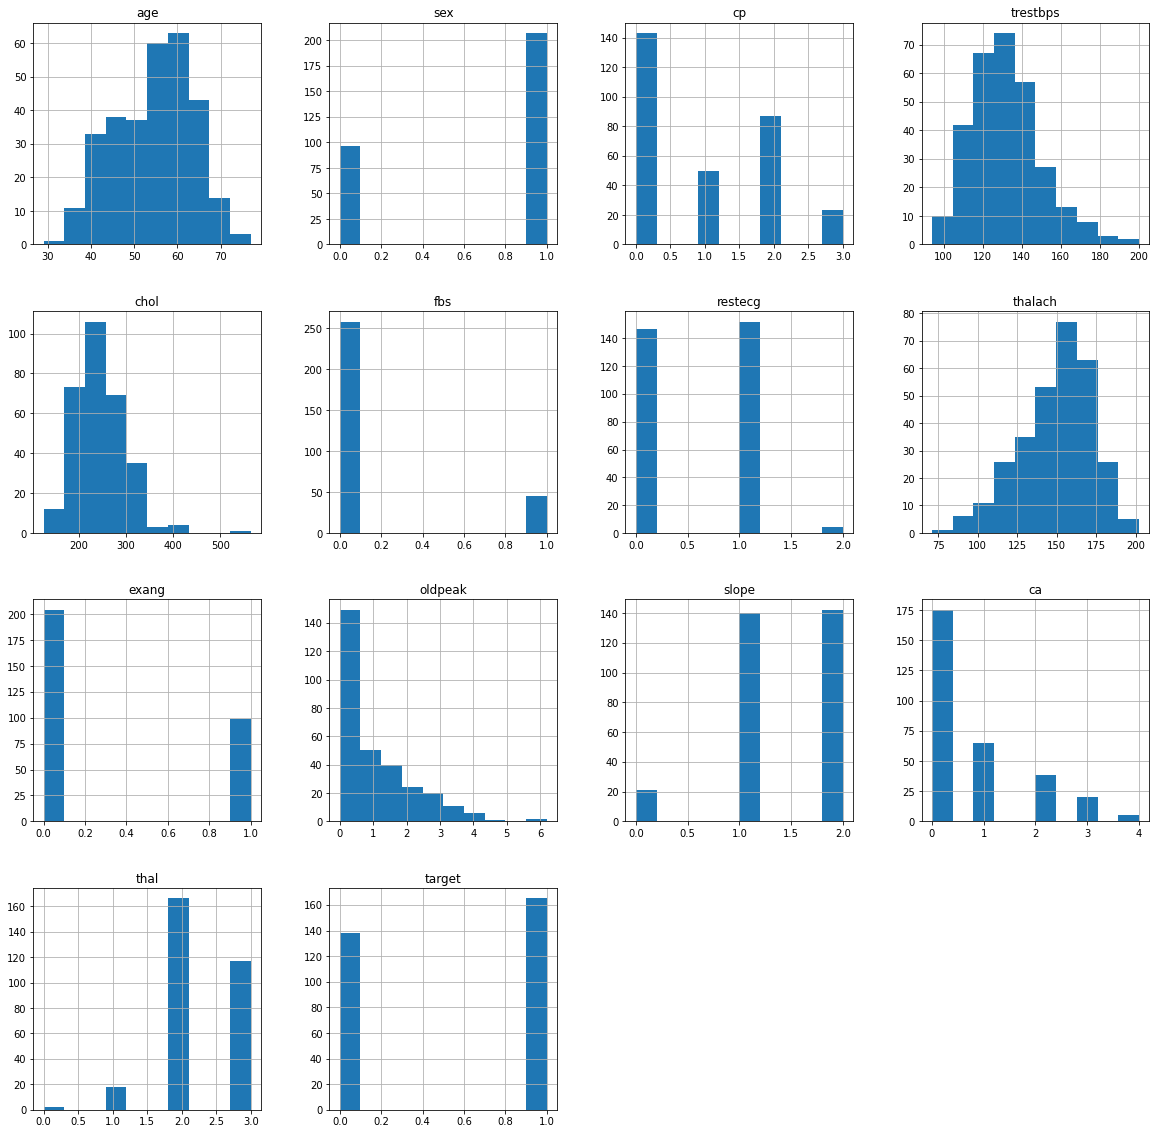

In [99]:
df.hist(figsize=(20,20));

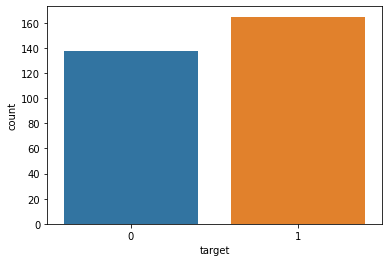

In [100]:
sns.countplot(df['target']);

### **Split the data**

### X,y

In [101]:
X = df.drop('target',axis=1)
y = df['target']

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### **Standarlize Data**

In [103]:
from sklearn.preprocessing import Normalizer
 
scaler = Normalizer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# new data

In [142]:
import csv, urllib.request
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
data= pd.read_csv(url, header=0, index_col=0, parse_dates=True, squeeze=True)

data = pd.DataFrame(data)

# data.columns.name = 'Month'
# data.drop('Month', axis=1)
data.head()



,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


In [143]:
from datetime import datetime
curr_dt = datetime.now()
 
print("Current datetime: ", curr_dt)
timestamp = int(round(curr_dt.timestamp()))
 
print("Integer timestamp of current datetime: ",
      timestamp)

for date in data['Month']:
    data = int(round(date.timestamp()))

Current datetime:  2022-09-16 13:34:32.953673
Integer timestamp of current datetime:  1663324473


KeyError: 'Month'

In [119]:
# # Parameter split_percent defines the ratio of training examples

# from sklearn.preprocessing import MinMaxScaler
# def get_train_test(url, split_percent=0.8):
#     df = pd.read_csv(url, header=0, index_col=0, parse_dates=True, squeeze=True)
#     data = np.array(df.values.astype('float32'))
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     data = scaler.fit_transform(data).flatten()
#     n = len(data)
#     # Point for splitting data into train and test
#     split = int(n*split_percent)
#     train_data = data[range(split)]
#     test_data = data[split:]
#     return train_data, test_data, data


# MODEL

In [ ]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim=13, output_dim=13))
# model.add(layers.Dense(units=13, activation='relu'))
model.add(layers.SimpleRNN(units=1000, activation='linear'))
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 13)          169       
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 1000)              1014000   
                                                                 
 dense_12 (Dense)            (None, 128)               128128    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,150,618
Trainable params: 1,150,618
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
model.fit(X_train,y_train,batch_size=32, epochs=20, verbose=1, callbacks= tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
))

Epoch 1/20
8/8 [==============================] - 1s 35ms/step - loss: 0.7127 - accuracy: 0.4421
Epoch 2/20
8/8 [==============================] - 0s 36ms/step - loss: 0.6965 - accuracy: 0.4917
Epoch 3/20
8/8 [==============================] - 0s 37ms/step - loss: 0.7068 - accuracy: 0.5165
Epoch 4/20
8/8 [==============================] - 0s 36ms/step - loss: 0.7013 - accuracy: 0.5000
Epoch 5/20
8/8 [==============================] - 0s 38ms/step - loss: 0.7043 - accuracy: 0.5248
Epoch 6/20
8/8 [==============================] - 0s 38ms/step - loss: 0.7026 - accuracy: 0.5083
Epoch 7/20
8/8 [==============================] - 0s 36ms/step - loss: 0.6918 - accuracy: 0.5165
Epoch 8/20
8/8 [==============================] - 0s 41ms/step - loss: 0.7327 - accuracy: 0.5083
Epoch 9/20
8/8 [==============================] - 0s 37ms/step - loss: 0.6995 - accuracy: 0.5000
Epoch 10/20
8/8 [==============================] - 0s 34ms/step - loss: 0.8656 - accuracy: 0.4752
Epoch 11/20
8/8 [============

In [ ]:
score = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 15ms/step - loss: 1.1096 - accuracy: 0.5574


In [ ]:
# model = keras.Sequential()

# model.add(tf.keras.Input(X.shape[1],))
# model.add(layers.Dense(128, activation='relu'))

# # model.add(layers.Embedding(input_dim=1000, output_dim=64))
# # model.add(layers.Dense(13))

# # The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
# # model.add(layers.GRU(256, return_sequences=True))

# # The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
# model.add(layers.SimpleRNN(128, activation='relu'))

# model.add(layers.Dense(1, activation='sigmoid'))

# # model.add(layers.Dense(10))

# model.summary()